# Oscar Classification

Here, we have data containing factors like actors' ratings, budget, marketing etc and we will try to predict whether it will get an oscar or not. Since it's a supervised and classification model, we'll be using Supervised Classification algorithms.

Importing the libraries:

In [31]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
sns.set(color_codes=True)
%matplotlib inline

In [32]:
#importing the data
df = pd.read_csv(r'Desktop/Movie_classification.csv')

In [33]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [34]:
#checking for missing values
df.isnull().sum()

Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                  0
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     0
Director_rating         0
Producer_rating         0
Critic_rating           0
Trailer_views           0
3D_available            0
Time_taken             12
Twitter_hastags         0
Genre                   0
Avg_age_actors          0
Num_multiplex           0
Collection              0
Start_Tech_Oscar        0
dtype: int64

In [35]:
#replacing the missing values with means
df['Time_taken'].fillna(value=df['Time_taken'].mean(), inplace=True)

In [36]:
df=pd.get_dummies(df,columns=['Genre','3D_available'], drop_first=True)

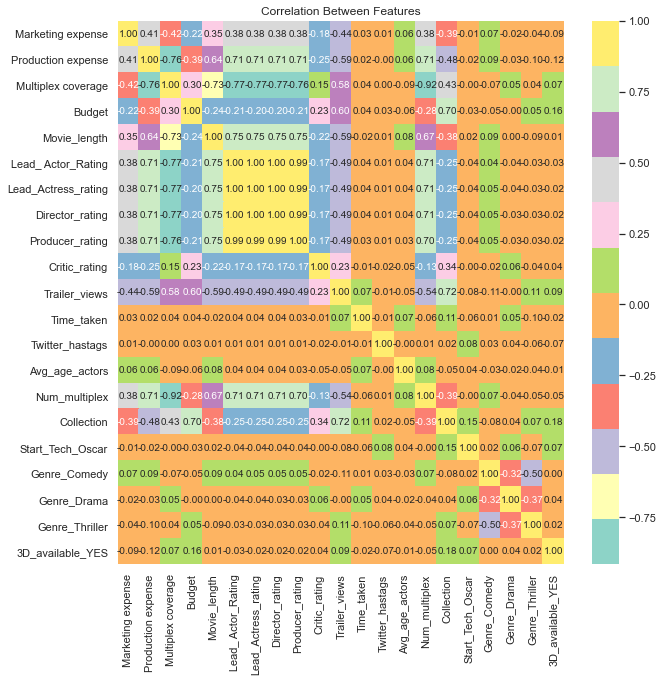

In [37]:
#to check correlation among variables
corr_matrix= df.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix,cmap="Set3", annot = True, fmt = ".2f");
plt.title("Correlation Between Features")
plt.show()

As we can see there's multicollinearity in data, we will be using Decision Tree and Support Vector Machine for our algorithms.

# Splitting the dataset

In [38]:
X=df.loc[:,df.columns!='Start_Tech_Oscar']
y=df['Start_Tech_Oscar']

In [39]:
print(X.shape)
print(y.shape)

(506, 20)
(506,)


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model Building

# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [43]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6372549019607843


<AxesSubplot:>

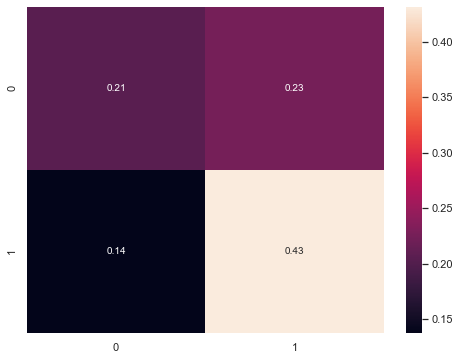

In [44]:
# cofusion matrix for DC
plt.subplots(figsize=(8,6))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':10})


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.48      0.53        44
           1       0.66      0.76      0.70        58

    accuracy                           0.64       102
   macro avg       0.63      0.62      0.62       102
weighted avg       0.63      0.64      0.63       102



# Support Vector Machine

In [46]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [47]:
y_pred2 = svclassifier.predict(X_test)

In [48]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.6176470588235294


In [49]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[27 17]
 [22 36]]
              precision    recall  f1-score   support

           0       0.55      0.61      0.58        44
           1       0.68      0.62      0.65        58

    accuracy                           0.62       102
   macro avg       0.62      0.62      0.61       102
weighted avg       0.62      0.62      0.62       102



<AxesSubplot:>

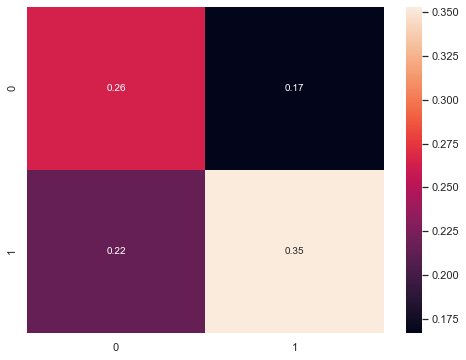

In [50]:
# cofusion matrix for SVM
plt.subplots(figsize=(8,6))
cf_matrix = confusion_matrix(y_test, y_pred2)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':10})

The accuracy and f1 score of SVM is better than decision tree therefore using decision tree would give more precise predictions.